<a href="https://colab.research.google.com/github/Chandnahc/Projects/blob/main/ML%20models/ObjectDetectionByCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [ ]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

# Loading Dataset

In [ ]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

In [ ]:
print('Training Images: {}'.format(x_train.shape))
print('Testing Images: {}'.format(x_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


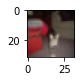

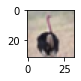

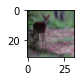

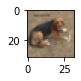

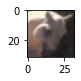

In [ ]:
for i in range(334,339):
  plt.subplot(120+1+i)
  img=x_train[i]
  plt.imshow(img)
  plt.show()

In [ ]:
x_train=x_train.reshape(x_train.shape[0],32,32,3)
x_test=x_test.reshape(x_test.shape[0],32,32,3)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train /= 255
x_test /=255
n_classes=10

print('Shape before one-hot encoding: ',y_train.shape)
y_train=np_utils.to_categorical(y_train, n_classes)
y_test=np_utils.to_categorical(y_test, n_classes)
print('Shape after one-hot encoding: ',y_train.shape)

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


# Building the model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

model=Sequential()
#convolution layers
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
#hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
#output layer
model.add(Dense(10, activation='softmax'))

#compiling
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

#training the model
model.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
391/391 [==============================] - 631s 2s/step - loss: 1.6144 - accuracy: 0.4059 - val_loss: 1.1881 - val_accuracy: 0.5736
Epoch 2/5
391/391 [==============================] - 574s 1s/step - loss: 1.1467 - accuracy: 0.5938 - val_loss: 0.9366 - val_accuracy: 0.6743
Epoch 3/5
391/391 [==============================] - 551s 1s/step - loss: 0.9600 - accuracy: 0.6627 - val_loss: 0.8476 - val_accuracy: 0.7065
Epoch 4/5
391/391 [==============================] - 550s 1s/step - loss: 0.8386 - accuracy: 0.7081 - val_loss: 0.7802 - val_accuracy: 0.7298
Epoch 5/5
391/391 [==============================] - 550s 1s/step - loss: 0.7607 - accuracy: 0.7356 - val_loss: 0.7314 - val_accuracy: 0.7485


In [ ]:
classes = range(0,10)

names=['airplane',
       'automobile',
       'bird',
       'cat',
       'deer',
       'dog',
       'frog',
       'horse',
       'ship',
       'truck']

#zip the names and classes to make a dictionary of class_labels
class_labels = dict(zip(classes, names))

#generating batch of 9 images to predict
batch = x_test[100:109]
labels = np.argmax(y_test[100:109], axis=-1)

#make predictions
predictions= model.predict(batch, verbose=1)

1/1 [==============================] - 0s 45ms/step


In [ ]:
print(predictions)

[[1.96446944e-03 1.97685818e-04 3.73231918e-02 6.35598898e-02
  5.51095188e-01 1.39363348e-01 9.48644523e-03 1.94902763e-01
  1.35523500e-03 7.51824933e-04]
 [2.41683377e-03 6.22320047e-04 4.30722125e-02 2.72473007e-01
  2.55280714e-02 5.03605306e-01 9.60703939e-02 4.88529541e-02
  2.37365626e-03 4.98522166e-03]
 [1.43547391e-03 5.25472779e-03 2.47042272e-02 1.82696134e-01
  5.16347215e-03 8.33963081e-02 6.87736869e-01 6.86450535e-03
  1.72554224e-03 1.02266110e-03]
 [7.97873421e-04 4.48710314e-04 7.92139303e-03 7.47008026e-01
  6.91835731e-02 1.03708141e-01 6.13536611e-02 6.65857177e-03
  7.75929133e-04 2.14416278e-03]
 [1.39740252e-04 9.77072239e-01 1.60832442e-07 4.07234324e-07
  2.40979631e-07 5.47234578e-08 4.16334771e-08 3.23608106e-07
  2.24598363e-04 2.25621648e-02]
 [3.01117223e-04 9.93675530e-01 1.29828061e-06 6.48922764e-07
  1.15503894e-07 2.74560410e-08 2.61823430e-07 2.45782719e-08
  2.90483306e-03 3.11615597e-03]
 [1.89933702e-01 6.31238194e-03 2.49836579e-01 1.85082480e

In [ ]:
for image in predictions:
  print(np.sum(image))

1.0
0.99999994
0.99999994
1.0000001
0.99999994
1.0
1.0000001
0.99999994
0.99999994


In [ ]:
class_result = np.argmax(predictions, axis=-1)
print(class_result)

[4 5 6 3 1 1 2 6 8]


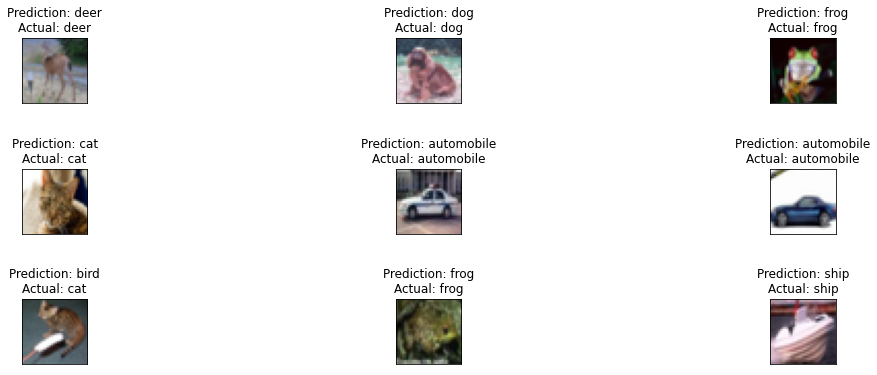

In [ ]:
fig, axs = plt.subplots(3,3,figsize=(19,6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i,img in enumerate(batch):
  for key,value in class_labels.items():
    if class_result[i]==key:
      title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
      axs[i].set_title(title)
      axs[i].axes.get_xaxis().set_visible(False)
      axs[i].axes.get_yaxis().set_visible(False)

  #plot the image
  axs[i].imshow(img)

#show the plot
plt.show()